# KMeans

K-Means is a popular clustering algorithm used in machine learning and data analysis. It is an unsupervised learning technique used to group data points into clusters based on similarity. The primary goal of K-Means is to partition data into K clusters, where each data point belongs to the cluster with the nearest mean (centroid).

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

In [11]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [12]:
df = pd.DataFrame(iris.data[:,2:])
df

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


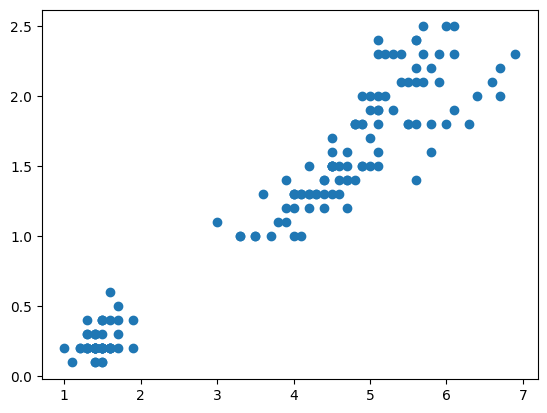

In [13]:
plt.scatter(df[0],df[1])

In [14]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[[0]],df[1])
y_predicted
df['cluster'] = y_predicted
df

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,0,1,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [15]:
km.cluster_centers_

array([[4.92525253],
       [1.49215686]])

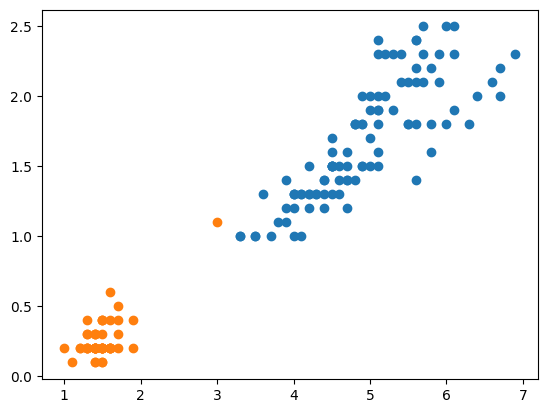

In [16]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
plt.scatter(df0[0],df0[1])
plt.scatter(df1[0],df1[1])

In [17]:
del km
scaler = MinMaxScaler()
df[0] = scaler.fit_transform(df[[0]])
df[1] = scaler.fit_transform(df[[1]])
df

,0,1,cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [18]:
# Optimizing the k-value
sse = []
for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit_predict(df[[0]],df[1])
    sse.append(km.inertia_)
sse

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

[13.33885090491238,
 1.9420778923288335,
 0.7084355277936198,
 0.361318905806122,
 0.2520150327949476,
 0.169632186009317,
 0.12192083068998746,
 0.09761380769786647,
 0.07420549198274243,
 0.06375764817811558]

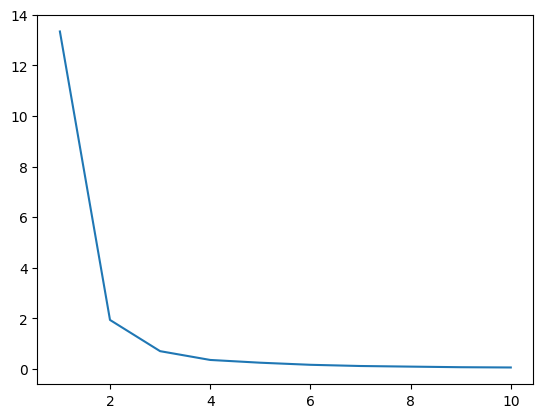

In [19]:
del km
plt.plot(range(1,11),sse)
# the best k-value is 2 / 3

C:\Users\jayaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


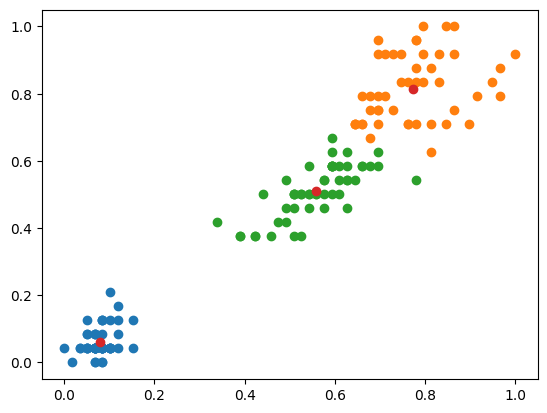

In [20]:
km = KMeans(n_clusters=3)
cluster = km.fit_predict(df[[0,1]])
df['cluster'] = cluster
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
plt.scatter(df0[0],df0[1])
plt.scatter(df1[0],df1[1])
plt.scatter(df2[0],df2[1])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

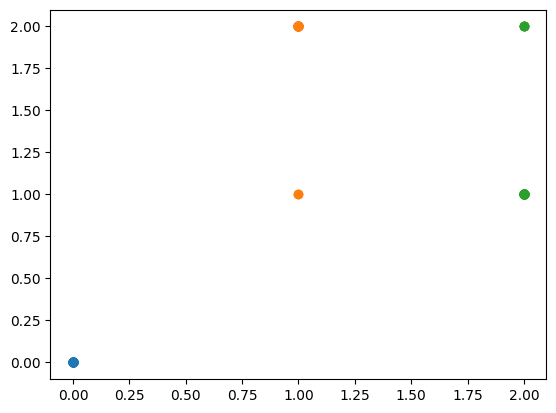

In [21]:
df['target'] = iris.target
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
plt.scatter(df0['cluster'],df0['target'])
plt.scatter(df1['cluster'],df1['target'])
plt.scatter(df2['cluster'],df2['target'])